## Начало лабораторной работы.
Выгрузка данных их csv-файла в датафрейм:

In [7]:
from typing import Any

import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt


df: DataFrame = pd.read_csv('..//static//csv//TSLA.csv')

Краткая информация о столбцах датафрейма:

In [8]:
df.info()
print(df.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Insider Trading  156 non-null    object 
 1   Relationship     156 non-null    object 
 2   Date             156 non-null    object 
 3   Transaction      156 non-null    object 
 4   Cost             156 non-null    float64
 5   Shares           156 non-null    object 
 6   Value ($)        156 non-null    object 
 7   Shares Total     156 non-null    object 
 8   SEC Form 4       156 non-null    object 
dtypes: float64(1), object(8)
memory usage: 11.1+ KB
      count        mean         std  min      25%      50%       75%      max
Cost  156.0  478.785641  448.922903  0.0  50.5225  240.225  934.1075  1171.04


## График 1.

### Круговая диаграмма.

Данная круговая диаграмма отображает распределение количества сделок, совершенных инсайдерами. Это позволяет сделать вывод о том, какие инсайдеры были наиболее активны в торговле акциями, давая возможность быстро оценить лидеров по количеству транзакций, коим в данном случае является CEO компании — Илон Маск.

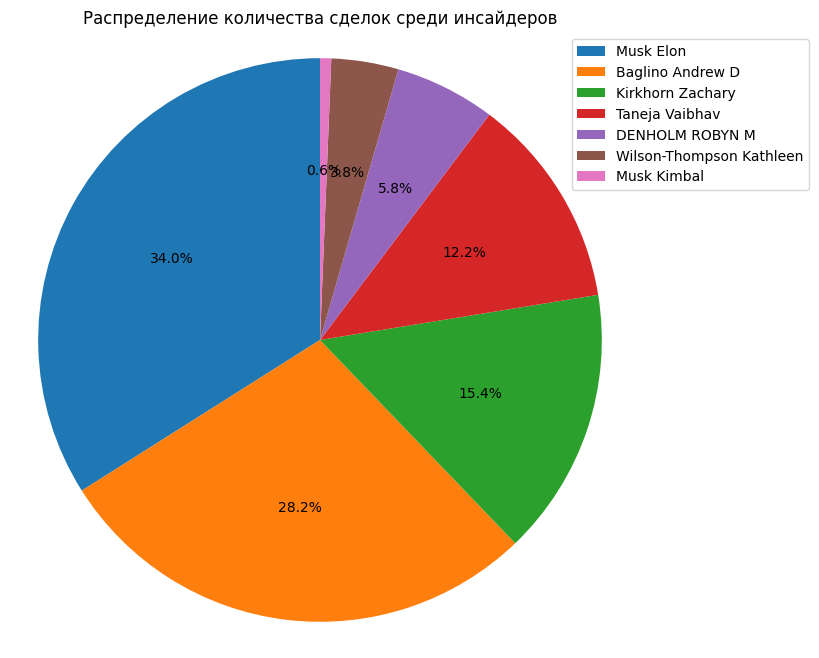

In [10]:
# Подсчет количества сделок для каждого инсайдера
insider_count: Series[int] = df['Insider Trading'].value_counts()

# Получение цветовой схемы
colors = plt.get_cmap('tab10')(range(len(insider_count)))

# Визуализация в виде круговой диаграммы
plt.figure(figsize=(8, 8))
insider_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, labels=['']*len(insider_count))

# Добавление легенды
plt.legend(labels=insider_count.index, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Распределение количества сделок среди инсайдеров')
plt.ylabel('')
plt.axis('equal')

# Отображение графика
plt.show()

## График 2.

### Столбчатая диаграмма.

Диаграмма показывает сколько сделок каждого типа было совершено инсайдерами. Для каждого инсайдера отдельный столбец, где каждый цвет представляет один тип сделки. На основе полученного графика можно сделать вывод, что основную часть сделок составляют продажи акций, а не опционов.

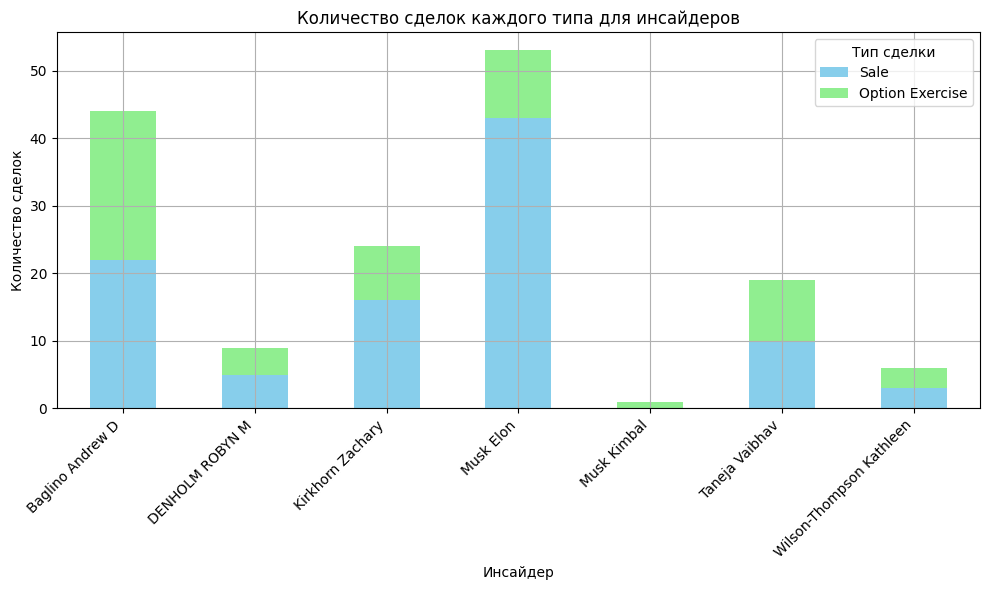

In [11]:
# Подсчет количества сделок каждого типа (Transaction) для каждого инсайдера
transaction_count: DataFrame | Series[Any] = df.groupby(['Insider Trading', 'Transaction']).size().unstack(fill_value=0)

# Визуализация в виде столбчатой диаграммы
transaction_count[['Sale', 'Option Exercise']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])

# Добавление легенды
plt.title('Количество сделок каждого типа для инсайдеров')
plt.xlabel('Инсайдер')
plt.ylabel('Количество сделок')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Тип сделки')
plt.grid(True)

# Отображение графика
plt.tight_layout()
plt.show()

## График 3.

### Линейная диаграмма.

Данная линейная диаграмма отображает количество сделок, совершённых инсайдерами, в разрезе по месяцам. Это помогает выявить периоды с наибольшей активностью инсайдеров или сезонные колебания на рынке. На графике видно, что продажи акций летом постепенно уменьшались и почти достигли своего минимума в конце сезона, после чего начался рост.

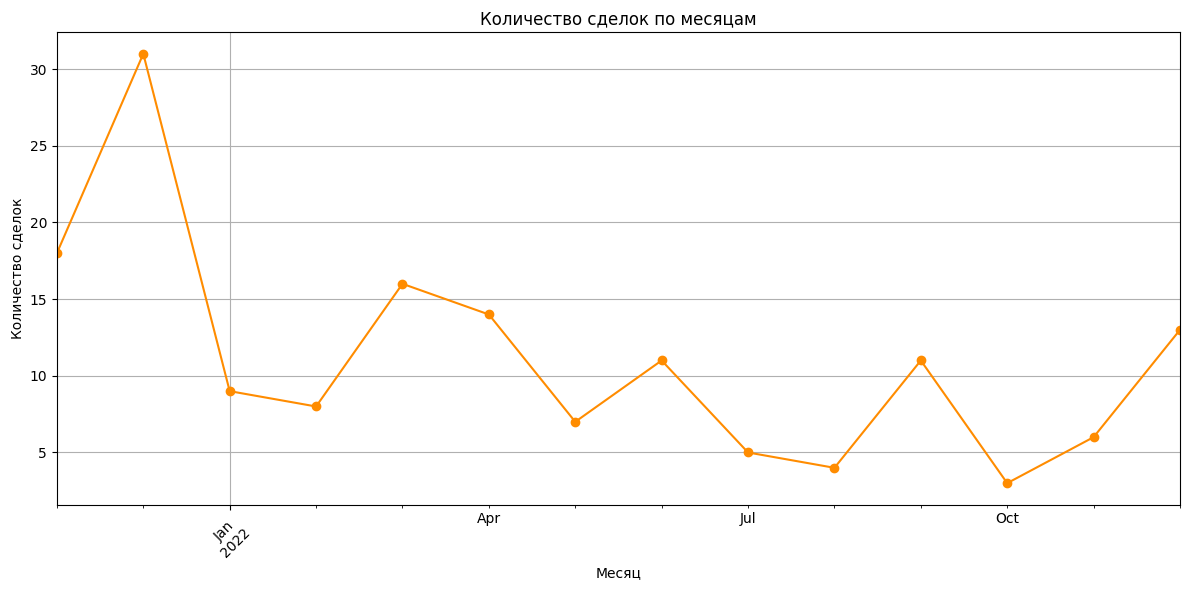

In [18]:
# Преобразование колонки 'Date' в datetime формат
df['Date'] = pd.to_datetime(df['Date'])

# Создание новой колонки с месяцами
df['Month'] = df['Date'].dt.to_period('M')

# Подсчет количества сделок по месяцам
monthly_transactions: DataFrame | Series[int] = df.groupby('Month').size()

# Визуализация в виде линейной диаграммы
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o', color='darkorange')

# Добавление легенды
plt.title('Количество сделок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество сделок')
plt.grid(True)
plt.xticks(rotation=45)

# Отображение графика
plt.tight_layout()
plt.show()